In [1]:
# import os
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

%matplotlib inline
# ---- settings ----
import json
Settings = json.load(open('../settings.txt'))
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sys
sys.path.insert(0, '../'); sys.path.insert(0, '../samples')
from paf_loader import Loader, load_confidence_map_and_paf
import numpy as np
import cv2
from cselect import color as cs
from time import time
import mvpose.data.kth_football2 as kth
from mvpose import pose
from mvpose.evaluation import pcp
from mvpose import settings
from os.path import isfile, join

data_root = Settings['data_root']

params = settings.get_settings(scale_to_mm=1000,
                               min_nbr_joints=5,
                               max_epi_distance=25)
# ==================================
# params = settings.get_settings(scale_to_mm=1000,
#                                min_nbr_joints=5,
#                                max_epi_distance=25,
#                               hm_detection_threshold=0.05,
#                               min_joint_distance=20,
#                               ms_radius=60,
#                               ms_between_distance=60)

import mvpose.data.skeleton_augmentation as ska
model_path = '../data/model_poseprediction.h5'
gen = ska.LimbGenerator(model_path, params.scale_to_mm)

# ----------------------------------
# ==================================
# default
seq1_zipname = 'player2sequence1.zip'
seq1_dir = 'Sequence 1'
# ----------------------------------


# seq1_zipname = 'player2sequence2.zip'
# seq1_dir = 'Sequence 2'
# ==================================
# ----------------------------------


# ====================================================
# Extractor Functions
# ====================================================
def extract_best(pos3d, Humans, alpha):
    """
        Extracts the best fitting human for the calculation
    """
    larms = 0
    uarms = 0
    ulegs = 0
    llegs = 0
    all_parts = 0
    
    for h in Humans:
        r = pcp.evaluate(pos3d, Humans[0], alpha)
        if all_parts < r.all_parts:
            larms = r.lower_arms
            uarms = r.upper_arms
            ulegs = r.upper_legs
            llegs = r.lower_legs
    
    return {
        "larms": larms,
        "uarms": uarms,
        "ulegs": ulegs,
        "llegs": llegs
    }


# OBJECTIVE_VALUES = []
# CENTERS_3D = []
# LIMBS = []
# PEAKS_3D = []
# PEAKS_2D = []

# MISSED_DETECTIONS = 0


def apply(frame, alpha, loader):
    """
    """
    #global OBJECTIVE_VALUES, CENTERS_3D, MISSED_DETECTIONS
    global seq1_zipname
    global seq1_zip
    global EXP_NBR
    Im, Calib, pos2d, pos3d = kth.get(
        data_root, seq1_zipname, seq1_dir, frame, player=2)
    heatmaps, pafs = loader.load_confidence_map_and_paf(
        'kth' + seq1_zipname[0:-4], Im, frame, dir=Settings['tmp'])
    
    
#     fname = join('/tmp', EXP_NBR + "_frame" + str(frame) + '.npy')
#     if isfile(fname):
#         detections = np.load(fname)
#     else:
    detections = pose.estimate(Calib, heatmaps, pafs, 
                           settings=params)

    #detections = gen.apply(detections)
    
    if len(detections) == 0:
        return {
            "larms": 0,
            "uarms": 0,
            "ulegs": 0,
            "llegs": 0
        }
        
    
    Humans = kth.transform3d_from_mscoco(detections)
    result1 = extract_best(pos3d, Humans, alpha)

        # ---------------------------------


    #     detections = gen.apply(detections)
    #     Humans = kth.transform3d_from_mscoco(detections)
    #     result2 = extract_best(pos3d, Humans, alpha)

    del Im
    del Calib
    del pos2d
    del pos3d
    del heatmaps
    del pafs
    del detections
    del Humans

    return result1
    
#     else:
#         MISSED_DETECTIONS += 1
#         centers3d = []
#         obj_value = []
#         limbs3d = []
#         peaks3d = []
#         peaks2d = []
        
#         CENTERS_3D.append(centers3d)
#         OBJECTIVE_VALUES.append(obj_value)
#         LIMBS.append(limbs3d)
#         PEAKS_3D.append(peaks3d)
#         PEAKS_2D.append(peaks2d)
        
#         return {
#             "larms": 0,
#             "uarms": 0,
#             "ulegs": 0,
#             "llegs": 0
#         }
        
#         np.save(fname, detections)
    
    #return result1, result2
    #return result1

/home/tanke/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
def run_experiment():
    
    loader = Loader(with_gpu=True)

    alpha = 0.5

    larms = []
    uarms = []
    llegs = []
    ulegs = []

    # 0 .. 214
    for frame in range(0, 214):
        _start = time()
        result = apply(frame, alpha, loader)
        larms.append(result['larms'])
        uarms.append(result['uarms'])
        llegs.append(result['llegs'])
        ulegs.append(result['ulegs'])

        _end = time()
        print('frame ' + str(frame) + ', elapsed', _end - _start)
    
    return larms, uarms, llegs, ulegs

larms, uarms, llegs, ulegs = run_experiment()

frame 0, elapsed 4.623001337051392
frame 1, elapsed 2.4828498363494873
frame 2, elapsed 2.4230847358703613
frame 3, elapsed 2.522603750228882
frame 4, elapsed 2.668429136276245
frame 5, elapsed 3.2553539276123047
frame 6, elapsed 2.587235450744629
frame 7, elapsed 2.6315195560455322
frame 8, elapsed 2.537858486175537
frame 9, elapsed 2.555695056915283
frame 10, elapsed 2.5531129837036133
frame 11, elapsed 2.587110996246338
frame 12, elapsed 2.5364227294921875
frame 13, elapsed 2.698582887649536
frame 14, elapsed 2.7251317501068115
frame 15, elapsed 2.5605080127716064
frame 16, elapsed 2.807431936264038
frame 17, elapsed 2.5274574756622314
frame 18, elapsed 2.4836649894714355
frame 19, elapsed 2.5258357524871826
frame 20, elapsed 2.630833625793457
frame 21, elapsed 2.5453126430511475
frame 22, elapsed 2.57090425491333
frame 23, elapsed 2.5612597465515137
frame 24, elapsed 2.5081238746643066
frame 25, elapsed 2.5840654373168945
frame 26, elapsed 2.735151767730713
frame 27, elapsed 2.5093

## Find best calib object

### A
* upper arms:	 0.9602803738317757
* lower arms:	 0.9135514018691588
* upper legs:	 0.9462616822429907
* lower legs:	 0.9088785046728972
* avg:		 0.9322429906542057

In [3]:
print("upper arms:\t", np.mean(uarms))
print("lower arms:\t", np.mean(larms))
print("upper legs:\t", np.mean(ulegs))
print("lower legs:\t", np.mean(llegs))
print('avg:\t\t', np.mean([
    np.mean(uarms), np.mean(larms), np.mean(ulegs), np.mean(llegs)
]))

upper arms:	 0.9532710280373832
lower arms:	 0.8411214953271028
upper legs:	 0.9439252336448598
lower legs:	 0.9042056074766355
avg:		 0.9106308411214953


In [4]:
# ==================================
# params = settings.get_settings(scale_to_mm=1000,
#                                min_nbr_joints=5,
#                                max_epi_distance=25)
# upper arms:	 0.9532710280373832
# lower arms:	 0.8411214953271028
# upper legs:	 0.9439252336448598
# lower legs:	 0.9042056074766355
# avg:		 0.9106308411214953

# ==================================
# params = settings.get_settings(scale_to_mm=1000,
#                                min_nbr_joints=5,
#                                max_epi_distance=25,
#                               hm_detection_threshold=0.05,
#                               min_joint_distance=20,
#                               ms_radius=60,
#                               ms_between_distance=60)
# upper arms:	 0.9649532710280374
# lower arms:	 0.852803738317757
# upper legs:	 0.9252336448598131
# lower legs:	 0.8925233644859814
# avg:		 0.9088785046728973

# ==================================
#params = settings.get_settings(scale_to_mm=1000)
# OHNE PC
# upper arms:	 0.8154205607476636
# lower arms:	 0.6612149532710281
# upper legs:	 0.7757009345794392
# lower legs:	 0.6565420560747663
# avg:		 0.7272196261682242


# ==================================
# params = settings.get_settings(scale_to_mm=1000,
#                               hm_detection_threshold=0.05,
#                               min_joint_distance=20,
#                               ms_radius=60,
#                               ms_between_distance=60)
# upper arms:	 0.8294392523364486
# lower arms:	 0.6915887850467289
# upper legs:	 0.7967289719626168
# lower legs:	 0.6869158878504673
# avg:		 0.7511682242990654

# ==================================
# params = settings.get_settings(scale_to_mm=1000,
#                                min_nbr_joints=5,
#                                max_epi_distance=25,
#                               hm_detection_threshold=0.05,
#                               min_joint_distance=20,
#                               ms_radius=60,
#                               ms_between_distance=60)

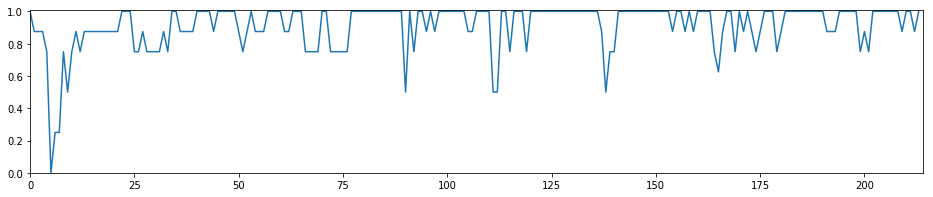

In [7]:
fig = plt.figure(figsize=(16,3))
ax = fig.add_subplot(111)
x = range(0, len(uarms))

# ax.plot(x, uarms, label='uarms')
# ax.plot(x, larms, label='larms')
# ax.plot(x, ulegs, label='ulegs')
# ax.plot(x, llegs, label='llegs')

mu = np.mean([uarms, larms, ulegs, llegs], axis=0)
ax.plot(x, mu)


#np.save('demo1_mu.npy', mu)
# mu_old = np.load('demo1_mu.npy')
# DIV = np.abs(mu - mu_old)
# print("div", np.sum(DIV))


ax.set_xlim([0, 214])
ax.set_ylim([0, 1.01])

#plt.legend()
plt.show()

mu at frame 5: 0.0
step 1: elapsed 0.30654311180114746
step 2: elapsed 0.003400087356567383
step 3: elapsed 0.015292167663574219
step 4: elapsed 0.29802799224853516
-------------------------------------------
Handle transitivity:
	Intra:		 13
	Intra(choice):	 2
	Inter:		 88
	Inter(choice):	 65
-------------------------------------------
	Time =  703  ms
	result: 0

	Total cost: 55.5636659581406

# valid points:		 34
# invalid points:	 9
step 5: elapsed 0.7064723968505859
(smart candidate selection) [
	Time =  2  ms
	result: 0

	Total cost: 3.767380466044415
] (smart candidate selection)
step 6: elapsed 0.004035472869873047


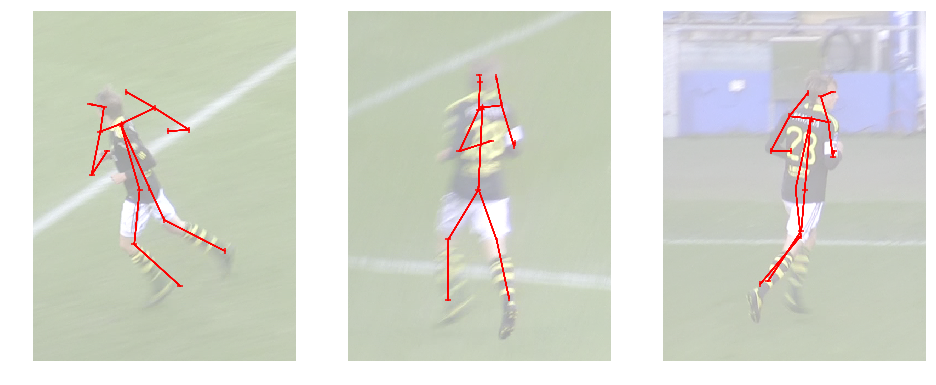

In [8]:
from mvpose.algorithm.candidate_selection import project_human_to_2d
from mvpose.plot.limbs import draw_mscoco_human

frame = 5
tmp = '/tmp'

print('mu at frame ' + str(frame) + ":", mu[frame])

Im, Calib, pos2d, pos3d = kth.get(
    data_root, seq1_zipname, seq1_dir, frame, player=2)
heatmaps, pafs = load_confidence_map_and_paf(
    'kth' + seq1_zipname[0:-4], Im, frame, dir=tmp)
_start = time()
Debug, detections = pose.estimate(Calib, heatmaps, pafs,
                                  settings=params, debug=True)


Humans = detections

fig = plt.figure(figsize=(16,12))

colors = ['red', 'blue', 'green']

for idx, cam in enumerate(Calib):
    ax = fig.add_subplot(1,3,1+idx)
    ax.axis('off')
    im = Im[idx]
    h,w,_ = im.shape
    ax.imshow(im, alpha=0.4)
    
    for pid, human in enumerate(Humans):
        draw_mscoco_human(ax, human, cam, color=colors[pid])
    
plt.show()

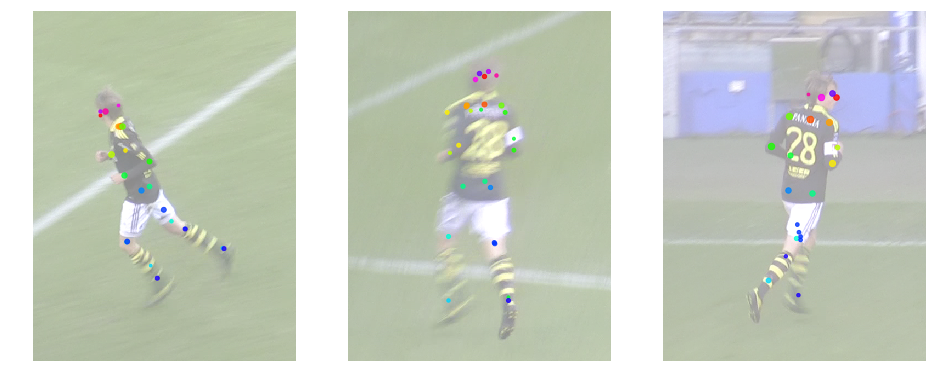

In [9]:
colors = cs.lincolor(20)/255

fig = plt.figure(figsize=(16,12))
for cid, im in enumerate(Im):
    ax = fig.add_subplot(1, 3, cid+1)
    ax.axis('off')
    ax.set_xlim([0, 480])
    ax.set_ylim([640, 0])
    ax.imshow(im, alpha=0.5)
    cam = Calib[cid]
    
    for jid in range(Debug.candidates2d.n_joints):
        centers2d_with_w = Debug.candidates2d.peaks2d[cid][jid]
        if len(centers2d_with_w) == 0:
            continue
        centers2d = centers2d_with_w[:,0:2].astype('float32')
        score = centers2d_with_w[:,2]
        for p2d in centers2d:
            if p2d is not None:
                x, y = p2d
                ax.scatter(x, y, color=colors[jid], s=score*50, alpha=0.8)
    
plt.show()

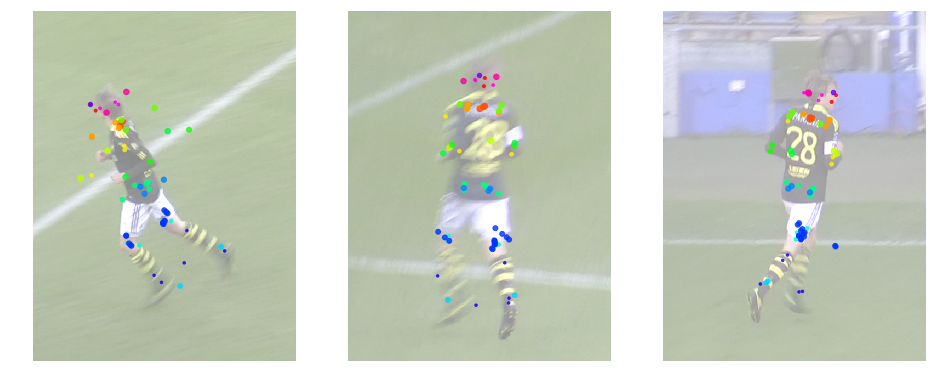

In [10]:
colors = cs.lincolor(20)/255

fig = plt.figure(figsize=(16,12))
for cid, im in enumerate(Im):
    ax = fig.add_subplot(1, 3, cid+1)
    ax.axis('off')
    ax.imshow(im, alpha=0.5)
    cam = Calib[cid]
    
    for jid in range(Debug.candidates2d.n_joints):
        centers3d_with_w = Debug.triangulation.peaks3d_weighted[jid]
        centers3d = centers3d_with_w[:,0:3].astype('float32')
        centers2d = cam.projectPoints(centers3d)
        score = centers3d_with_w[:,3]
        for p2d in centers2d:
            if p2d is not None:
                x, y = p2d
                ax.scatter(x, y, color=colors[jid], s=score*50, alpha=0.8)
                #ax.text(x, y, str(jid))
    
plt.show()

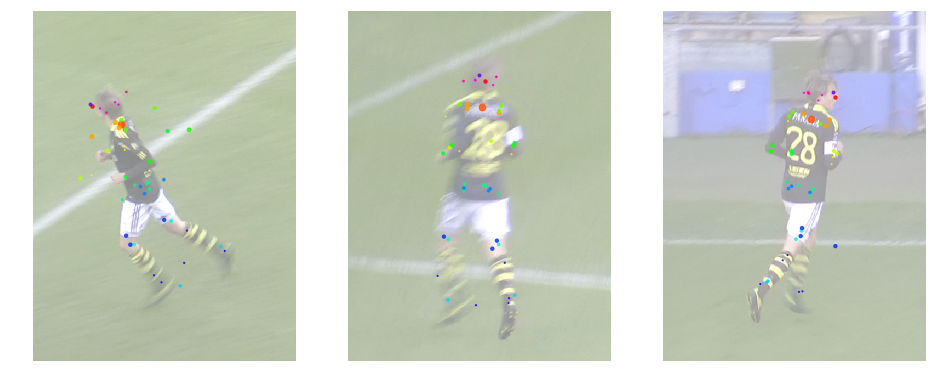

In [11]:
colors = cs.lincolor(20)/255

fig = plt.figure(figsize=(16,12))
for cid, im in enumerate(Im):
    ax = fig.add_subplot(1, 3, cid+1)
    ax.axis('off')
    ax.imshow(im, alpha=0.5)
    cam = Calib[cid]
    
    for jid in range(Debug.candidates2d.n_joints):
        centers3d_with_w = Debug.meanshift.centers3d[jid]
        centers3d = centers3d_with_w[:,0:3].astype('float32')
        centers2d = cam.projectPoints(centers3d)
        score = centers3d_with_w[:,3]
        for p2d in centers2d:
            if p2d is not None:
                x, y = p2d
                ax.scatter(x, y, color=colors[jid], s=score*50, alpha=0.8)
                #ax.text(x, y, str(jid))
    
plt.show()

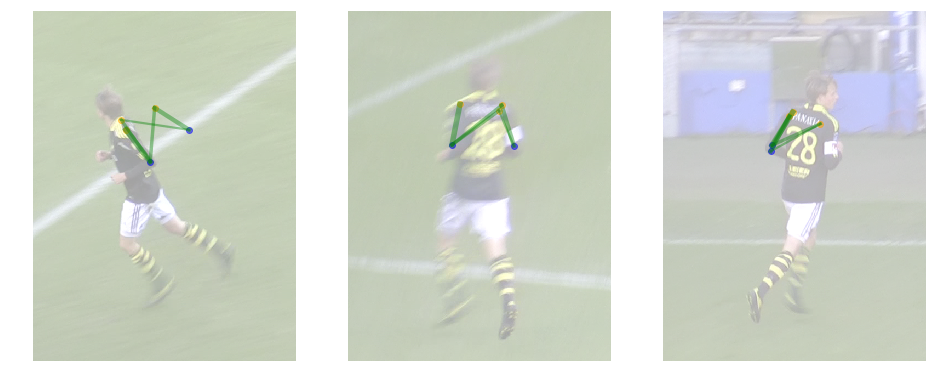

In [12]:
from mvpose.data.default_limbs import DEFAULT_LIMB_SEQ

# left leg = 11
# right arm = 2,3
# left arm = 4,5
LIMB_ID = 4
a,b = DEFAULT_LIMB_SEQ[LIMB_ID]

W = Debug.limbs3d[LIMB_ID]
n,m = W.shape

candA = Debug.meanshift.centers3d[a][:,0:3]
candB = Debug.meanshift.centers3d[b][:,0:3]
assert n == len(candA) and m == len(candB)

fig = plt.figure(figsize=(16,12))


for idx, cam in enumerate(Calib):
    ax = fig.add_subplot(1, 3,1+idx)
    ax.axis('off')
    im = Im[idx]
    h,w,_ = im.shape
    ax.imshow(im, alpha=0.4)
    
    ptsA2d, maskA = cam.projectPoints(candA, withmask=True, binary_mask=False)
    ptsB2d, maskB = cam.projectPoints(candB, withmask=True, binary_mask=False)
    
    ax.scatter(ptsA2d[maskA][:,0], ptsA2d[maskA][:,1], color='orange', alpha=0.5)
    ax.scatter(ptsB2d[maskB][:,0], ptsB2d[maskB][:,1], color='blue', alpha=0.5)
    
    sq_maskA = np.squeeze(maskA[0])
    sq_maskB = np.squeeze(maskB[0])
    if len(sq_maskA.shape) == 0:
        sq_maskA = np.expand_dims(sq_maskA, axis=0)
    if len(sq_maskB.shape) == 0:
        sq_maskB = np.expand_dims(sq_maskB, axis=0)
    
    for _a in sq_maskA:
        for _b in sq_maskB:
            w = W[_a,_b]
            Ax,Ay = ptsA2d[_a]
            Bx,By = ptsB2d[_b]
            if w > 0:
                ax.plot([Ax,Bx], [Ay,By], color='green', linewidth=w*10, alpha=0.4)
            elif w > -99999:
                ax.plot([Ax,Bx], [Ay,By], color='red', linewidth=-w*10, alpha=0.4)

plt.show()

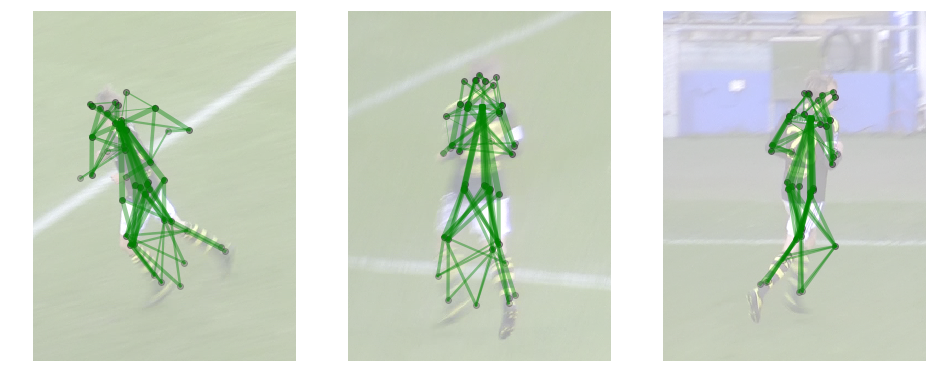

In [13]:
import numpy.linalg as la

fig = plt.figure(figsize=(16,12))

for idx, cam in enumerate(Calib):
    ax = fig.add_subplot(1, 3,1+idx)
    ax.axis('off')
    im = Im[idx]
    h,w,_ = im.shape
    ax.imshow(im, alpha=0.4)
    for lid, (a, b) in enumerate(DEFAULT_LIMB_SEQ):
        candA = Debug.meanshift.centers3d[a][:,0:3]
        candB = Debug.meanshift.centers3d[b][:,0:3]
        W = Debug.limbs3d[lid]
        n, m = W.shape
        assert n == len(candA) and m == len(candB)
        
        ptsA2d, maskA = cam.projectPoints(candA, withmask=True, binary_mask=False)
        ptsB2d, maskB = cam.projectPoints(candB, withmask=True, binary_mask=False)

        ax.scatter(ptsA2d[maskA][:,0], ptsA2d[maskA][:,1], color='black', alpha=0.2)
        ax.scatter(ptsB2d[maskB][:,0], ptsB2d[maskB][:,1], color='black', alpha=0.2)
        
        sq_maskA = np.squeeze(maskA[0])
        sq_maskB = np.squeeze(maskB[0])
        if len(sq_maskA.shape) == 0:
            sq_maskA = np.expand_dims(sq_maskA, axis=0)
        if len(sq_maskB.shape) == 0:
            sq_maskB = np.expand_dims(sq_maskB, axis=0)
        
        min_length, max_length = params.sensible_limb_length[lid]
        
        for _a in sq_maskA:
            for _b in sq_maskB:
                p3dA = candA[_a]
                p3dB = candB[_b]
                distance = la.norm(p3dA - p3dB)
                lstype = '-'
                if distance < min_length or distance > max_length:
                    lstype = ':'
                    
                w = W[_a,_b]
                Ax,Ay = ptsA2d[_a]
                Bx,By = ptsB2d[_b]
                if w > 0:
                    ax.plot([Ax,Bx], [Ay,By], color='green', 
                            linestyle=lstype, linewidth=w*10, alpha=0.4)
                elif w > -99999:
                    ax.plot([Ax,Bx], [Ay,By], color='red', 
                            linestyle=lstype, linewidth=-w*10, alpha=0.4)

plt.show()